In [1]:
!pip3 install simpy

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [37]:
import numpy as np

import simpy


np.random.seed(0)


def warehouse_run(env, order_cutoff, order_target):
    global inventory, balance, num_ordered
    
    inventory = order_target
    balance = 0
    num_ordered = 0
    
    while True:
        interarrival = generate_interarrival()
        yield env.timeout(interarrival)
        
        balance -= inventory * 2 * interarrival
        
        demand = generate_demand()
        if demand <= inventory:
            balance += demand * 100
            inventory -= demand
            print('{:.2f} sold {}'.format(env.now, demand))
        else:
            balance += inventory * 100
            inventory = 0
            print('{:.2f} sold out {}'.format(env.now, inventory))

        if inventory < order_cutoff and num_ordered == 0:
            env.process(handle_order(env, order_target))


def handle_order(env, order_target):
    global inventory, balance, num_ordered
    num_ordered = order_target - inventory
    print('{:.2f} placed order {}'.format(env.now, num_ordered))
    balance -= 50 * num_ordered
    yield env.timeout(2)
    inventory += num_ordered
    num_ordered = 0
    print('{:.2f} received order {}'.format(env.now, inventory))

        
def generate_interarrival():
    return np.random.exponential(1./5)

def generate_demand():
    return np.random.randint(1, 5)

  
obs_time = []
balance_level = []
inventory_level = []

def observe(env):
    global inventory, balance
    while True:
        obs_time.append(env.now)
        inventory_level.append(inventory)
        balance_level.append(balance)
        yield env.timeout(0.1)
      

env = simpy.Environment()
env.process(warehouse_run(env, 25, 50))
env.process(observe(env))

env.run(until=5)

0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.61 sold 2
1.97 sold 1
1.99 sold 4
1.99 placed order 28
2.08 sold 2
2.38 sold 4
2.79 sold 4
3.11 sold 4
3.26 sold 4
3.28 sold 1
3.46 sold 2
3.99 received order 29
4.04 sold 4
4.06 sold 4
4.06 placed order 29
4.12 sold 4
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.82 sold 1
4.92 sold 1


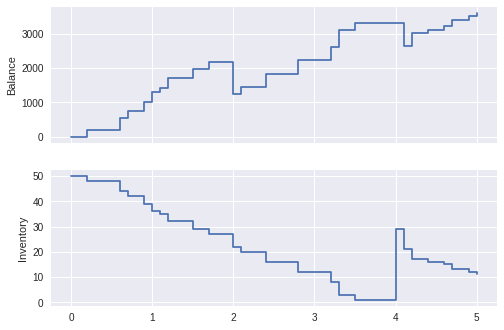

In [41]:
import matplotlib.pylab as plt

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.step(obs_time, balance_level, where='post')
ax1.set_ylabel('Balance')
ax2.step(obs_time, inventory_level, where='post')
ax2.set_ylabel('Inventory')
plt.show()

In [45]:
print('Final: ${:.2f}'.format(balance_level[-1] + inventory_level[-1]*50))

Final: $4148.09
